In [1]:
# mounting the drive 
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Importing libraries and modules
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/cleaned_15k_dataset.csv', encoding='latin-1')

In [4]:
# printing the dataframe 
df.head(10)

,artist,lyric,title,rating
0,Hillsong,i will love you lord my strength i belong to y...,I Will Love,0
1,Vera Lynn,when the light go on again all over the world ...,When the Lights Go on Again,0
2,Georgia Mass Choir,when you be down and in despair do not be unea...,"Hold On, Help Is on the Way",0
3,Richard Wyands,let build a stairway to the star and climb tha...,Stairway to the Stars,0
4,Echo & the Bunnymen,show me something that i have not see before s...,Proxy,1
5,Tripping Daisy,she the melt pot of summer she a balloon with ...,Stella Is a Planet,0
6,Brian McKnight,nelly look just ai not the same when you slid...,All Night Long,1
7,Lenny Kravitz,i be you and you be me why that such a mystery...,Believe,0
8,Billy Bragg,on monday i wish it be tuesday night so i can ...,Wishing the Days Away [Ballad Version],0
9,Betty Elders,i have see that kind of hurt before you keep i...,Crayons,0


In [5]:
# drop the unnecessary columns
df.drop('artist', axis=1, inplace=True)
df.head(10)

,lyric,title,rating
0,i will love you lord my strength i belong to y...,I Will Love,0
1,when the light go on again all over the world ...,When the Lights Go on Again,0
2,when you be down and in despair do not be unea...,"Hold On, Help Is on the Way",0
3,let build a stairway to the star and climb tha...,Stairway to the Stars,0
4,show me something that i have not see before s...,Proxy,1
5,she the melt pot of summer she a balloon with ...,Stella Is a Planet,0
6,nelly look just ai not the same when you slid...,All Night Long,1
7,i be you and you be me why that such a mystery...,Believe,0
8,on monday i wish it be tuesday night so i can ...,Wishing the Days Away [Ballad Version],0
9,i have see that kind of hurt before you keep i...,Crayons,0


In [6]:
import pandas as pd
import numpy as np
import string, re
import itertools
import nltk
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS

In [7]:
# drop the unnecessary columns
df.drop('title', axis=1, inplace=True)
df.head(10)

,lyric,rating
0,i will love you lord my strength i belong to y...,0
1,when the light go on again all over the world ...,0
2,when you be down and in despair do not be unea...,0
3,let build a stairway to the star and climb tha...,0
4,show me something that i have not see before s...,1
5,she the melt pot of summer she a balloon with ...,0
6,nelly look just ai not the same when you slid...,1
7,i be you and you be me why that such a mystery...,0
8,on monday i wish it be tuesday night so i can ...,0
9,i have see that kind of hurt before you keep i...,0


In [8]:
# veryfying the sentiment values
# 1 is positive sentiment and 0 is negative sentiment
df['rating'].value_counts()

#0    7500
#1    7500

0    7500
1    7500
Name: rating, dtype: int64

In [9]:
lens = df['lyric'].str.len()
print(lens.mean())
print(lens.std())
print(lens.min())
print(lens.max())

1048.197
596.8841662932017
277
8545


In [10]:
print(df.dropna().shape)

(15000, 2)


In [11]:
df['senLen'] = df['lyric'].apply(lambda x: len(x))
data = df.sort_values(by='senLen')
plot = go.Scatter(x = data['senLen'], y = data['rating'], mode='markers')
lyt = go.Layout(title="lyric Length vs. valence label", xaxis=dict(title='lyric Length'),yaxis=dict(title='Label'))
fig = go.Figure(data=[plot], layout=lyt)
py.iplot(fig)

In [12]:
from wordcloud import WordCloud,STOPWORDS

In [13]:
df.head(5)

,lyric,rating,senLen
0,i will love you lord my strength i belong to y...,0,372
1,when the light go on again all over the world ...,0,618
2,when you be down and in despair do not be unea...,0,1121
3,let build a stairway to the star and climb tha...,0,436
4,show me something that i have not see before s...,1,1188


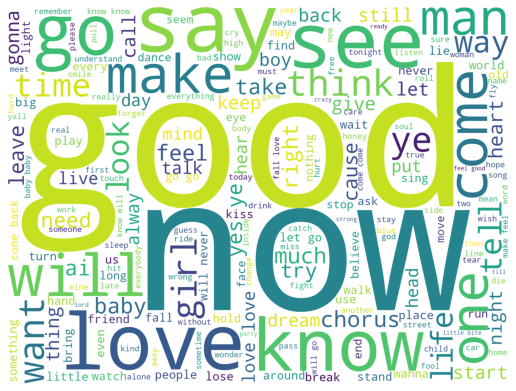

In [14]:
df_pos = df[ df['rating'] == 1]
df_pos = df_pos['lyric']

wordcloud1 = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          width=2000,
                          height=1500
                          ).generate(" ".join(df_pos))
plt.figure(1,figsize=(9, 9))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

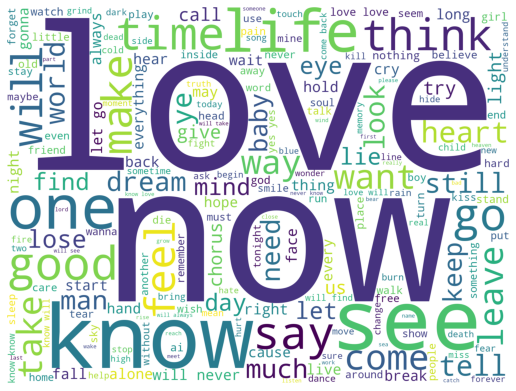

In [ ]:
df_neg = df[ df['rating'] == 0]
df_neg = df_neg['lyric']

wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2000,
                      height=1500
                      ).generate(" ".join(df_neg))
plt.figure(1,figsize=(9, 9))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

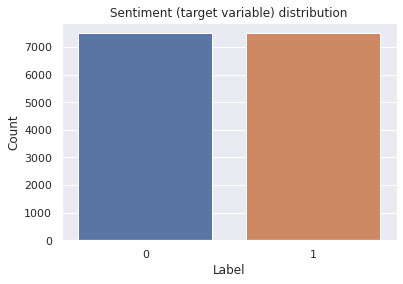

In [15]:
sns.set(style="darkgrid")
b = sns.countplot(x='rating',
                  data = df.drop(['lyric'], axis=1))
b.axes.set_title('Sentiment (target variable) distribution')
b.set_xlabel("Label")
b.set_ylabel("Count")
plt.show()

In [16]:
df.lyric = df.lyric.astype(str)

In [17]:
# splitting the data into training and testing data

from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(df['lyric'].values, df['rating'].values, test_size=0.30)  # 70-30 training andtest split

# split the lyric text into x_train and x_test and rating (valence) into y_train and y_test.

In [19]:
# Check the x_train data after split

print('sentiment Text: ', x_train[0])

sentiment Text:  good old king kong be a  ofva gorilla he stand four story tall they shoot him with missile from aeroplane but he refuse to fall with faye ray in the palm of his hand he walk right over the world because just like me he would do anything just to keep his girl yes old king kong be just a little monkey compare to my love for you if you treat right every night and to do what you want to i say it big than both of us and now you know it true old king kong be just a little monkey compare to my love for you now when king kong meet godzilla he make that lizard crawl it be not until he put his woman down that she see that big tear fall and when you be walk next to me i swear i can fill his shoe old king kong be just a little monkey compare to my love for you yes old king kong be just a little monkey compare to my love for you if you treat right every night and to do what you want to i say it big than both of us and now you know it true old king kong be just a little monkey compa

In [20]:
# Check the y_train data after split

print('sentiment: ', y_train[0])

sentiment:  1


In [21]:
# Check the x_test data  after split

print('sentiment Text: ', x_test[0])

sentiment Text:  why do you go on pretend you know you want to be free darling you know i will let you go you would do the same for me i understand and darling you be not to blame if when we kiss it not the same i understand it not your fault because your heart have change it mind you do not mean to be unkind i understand forget you will be far from easy i have grow so use to your charm i will miss that old thrill and no one can fill the place here in my arm but if you find our love be really mean to be then darling hurry back to me and i will understand i understand and darling you be not to blame if when we kiss it not the same i understand it not your fault because your heart have change it mind you do not mean to be unkind i understand forget you will be far from easy i have grow so use to your charm i will miss that old thrill and no one can fill the place here in my arm but if you find our love be really mean to be then darling hurry back to me


In [22]:
# Check the y_test data  after split

print('sentiment: ', y_test[0])

sentiment:  0


In [23]:
# converting the strings into integers using Tokenizer 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [24]:
# instantiating the tokenizer
MAX_VOCAB = 90000000 # is basically max features. How many unique words to use i.e., num or rows in embedding vector)
tokenizer = Tokenizer(num_words= MAX_VOCAB)
tokenizer.fit_on_texts(x_train) # fit on input x_train data

In [25]:
# Checking the word index for the length of vocab we have 
WordIndex = tokenizer.word_index

# Calculate the vocabulary size of the dataset
Vocab_size = len(WordIndex)
print('The size of datatset vocab is: ', Vocab_size) 

The size of datatset vocab is:  28164


In [26]:
# Convert Train data and Test data text into sequences
train_seq = tokenizer.texts_to_sequences(x_train)
test_seq = tokenizer.texts_to_sequences(x_test)
print('Training sequence: ', train_seq[0])
print('Testing sequence: ', test_seq[0])

Training sequence:  [39, 140, 364, 3946, 3, 7, 15857, 4083, 56, 147, 535, 481, 797, 47, 405, 138, 31, 3194, 62, 5844, 29, 56, 1346, 5, 111, 31, 12238, 1810, 12, 4, 1728, 15, 114, 119, 56, 137, 86, 118, 4, 95, 78, 33, 32, 10, 56, 61, 13, 360, 33, 5, 91, 114, 89, 55, 140, 364, 3946, 3, 33, 7, 92, 861, 1457, 5, 11, 23, 25, 2, 45, 2, 631, 86, 116, 77, 6, 5, 13, 35, 2, 53, 5, 1, 38, 8, 192, 157, 453, 15, 120, 6, 41, 2, 26, 8, 188, 140, 364, 3946, 3, 33, 7, 92, 861, 1457, 5, 11, 23, 25, 2, 41, 34, 364, 3946, 250, 12239, 56, 43, 14, 4962, 730, 8, 3, 9, 287, 56, 166, 114, 236, 49, 14, 44, 42, 14, 192, 202, 111, 6, 34, 2, 3, 137, 403, 5, 10, 1, 595, 1, 19, 394, 114, 548, 140, 364, 3946, 3, 33, 7, 92, 861, 1457, 5, 11, 23, 25, 2, 55, 140, 364, 3946, 3, 33, 7, 92, 861, 1457, 5, 11, 23, 25, 2, 45, 2, 631, 86, 116, 77, 6, 5, 13, 35, 2, 53, 5, 1, 38, 8, 192, 157, 453, 15, 120, 6, 41, 2, 26, 8, 188, 140, 364, 3946, 3, 33, 7, 92, 861, 1457, 5, 11, 23, 25, 2, 55, 140, 364, 3946, 3, 33, 7, 92, 861, 1457

Notice that the train and test sequences are of unequal length so, now apply padding so that the train and test sequences are of equal length.

In [27]:
# Padding the training sequences to get equal length sequence to use sequences of equal length
pad_train = pad_sequences(train_seq)
padded_seq_len = pad_train.shape[1]
print('The length of training sequence is: ', padded_seq_len) 

The length of training sequence is:  1722


In [29]:
# Padding the test sequences to get equal length sequence to use sequences of equal length
pad_test = pad_sequences(test_seq, maxlen=padded_seq_len)
print('The length of testing sequence is: ', pad_test.shape[1])

The length of testing sequence is:  1722


In [30]:
# Model using Keras API

from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, GlobalMaxPooling1D
from tensorflow.keras.models import Model # intiate the model 

# Layers used in this model are : Input, Dense, Embedding, LSTM, GlobalMaxPooling1D

In [31]:
Embedding_layer_dimension = 20 
LSTM_layer_dimension = 15

input_layer = Input (shape=(padded_seq_len, ))   
output = Embedding(Vocab_size + 1, Embedding_layer_dimension)(input_layer)    #  Vocab_size + 1 because the indexing of the words in vocabulary (Vocab_size) start from 1 not 0
output = LSTM(LSTM_layer_dimension, return_sequences=True)(output)
output = GlobalMaxPooling1D()(output)
output = Dense(32, activation='relu')(output)
output = Dense(1, activation='sigmoid')(output) # Dense layer with class 1 because the sentiment valence is either positive or negative
# And because of binary classification 'sigmoid' activation

# Note: using "softmax" activation instead of 'sigmoid' considerably reduces the accuracy of the model to less than 50%.

In [32]:
# feed input and output to the model for model intiation.
model = Model(input_layer,output) 

In [33]:
# compiling the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# 'binary_crossentropy' loss because of binary classification (pos and neg)

In [34]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1722)]            0         
                                                                 
 embedding (Embedding)       (None, 1722, 20)          563300    
                                                                 
 lstm (LSTM)                 (None, 1722, 15)          2160      
                                                                 
 global_max_pooling1d (Globa  (None, 15)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 32)                512       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                             

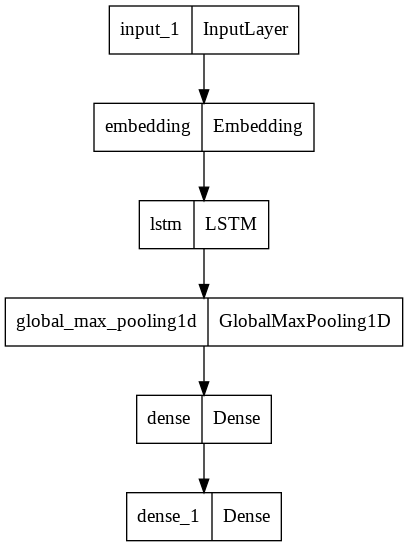

In [35]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [36]:
# training the model
r = model.fit(pad_train, y_train, 
              validation_data=(pad_test, y_test),
              epochs=2,
              shuffle=True,
              batch_size=16,
              verbose=1)

Epoch 1/2
657/657 [==============================] - 490s 742ms/step - loss: 0.6281 - accuracy: 0.6432 - val_loss: 0.5865 - val_accuracy: 0.7033
Epoch 2/2
657/657 [==============================] - 485s 738ms/step - loss: 0.5250 - accuracy: 0.7454 - val_loss: 0.5728 - val_accuracy: 0.7038


In [37]:
model.evaluate(pad_test, y_test)

141/141 [==============================] - 15s 104ms/step - loss: 0.5728 - accuracy: 0.7038


[0.5728389620780945, 0.7037777900695801]

# LSTM Model Evaluation 


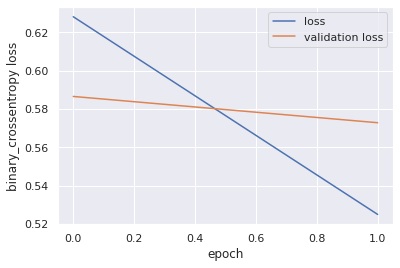

In [105]:
# Evaluating the model
# plotting the loss and validation loss of the model
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label = 'validation loss')
plt.xlabel("epoch")
plt.ylabel("binary_crossentropy loss")
plt.legend()

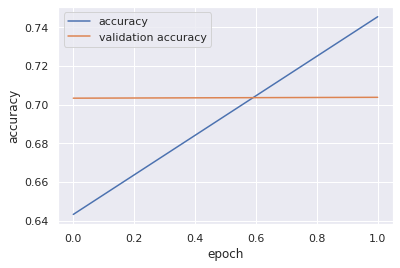

In [104]:
# plotting the accuracy and validation accuracy of the model
plt.plot(r.history['accuracy'], label= 'accuracy')
plt.plot(r.history['val_accuracy'], label='validation accuracy')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

In [40]:
# extract the predicted probabilities
p_pred = model.predict(pad_test)
p_pred = p_pred.flatten()
print(p_pred.round(2))

[0.35 0.34 0.21 ... 0.14 0.66 0.71]


In [41]:
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

[0 0 0 ... 0 1 1]


In [42]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred)) # confusion matrix on testing data

[[1554  686]
 [ 647 1613]]


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70      2240
           1       0.70      0.71      0.71      2260

    accuracy                           0.70      4500
   macro avg       0.70      0.70      0.70      4500
weighted avg       0.70      0.70      0.70      4500



you can use confusion matric to calculate precision, recall, accuaracy, score, sensitivity and specificity.

Use the confusion matrix to calculate:

TP (True Postive)
TN (True Negative)
FN (False Negative)
FP (False Positve)
Use that information to calculate precision and recall. Then use precision and recall to calculate F1-score.

Precision, recall and F1-score can also be calculated using sklearn library.

In [44]:
True_Positive = 1613
True_Negative = 1554
False_Positive = 686
False_Negative = 647

In [45]:
recall = True_Positive/(True_Positive + False_Negative)
recall

0.713716814159292

In [46]:
precision = True_Positive/(True_Positive + False_Positive)
precision

0.7016093953892997

In [47]:
F1_score = (precision * recall / (precision + recall)) * 2
F1_score

0.7076113182715508

In [50]:
# Sensitivity is a measure of the proportion of actual positive cases that got predicted as positive (or true positive). 
# Sensitivity is also termed as Recall. 

sensitivity =  (True_Positive)/(True_Positive + False_Negative)
sensitivity

0.713716814159292

In [51]:
specificity = (True_Negative)/(True_Negative + False_Positive)
specificity 

0.69375

Text(30.5, 0.5, 'Prediction')

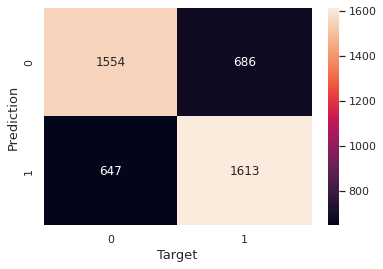

In [95]:
import seaborn as sns
q = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g') 
# fmt='g' to show numbers in decimal notation instead of E-notation.
# annot=True to show 0 and 1 in the heatmap.

q.set_xlabel("Target", fontsize = 13)
q.set_ylabel("Prediction", fontsize = 13)

Text(30.5, 0.5, 'Prediction')

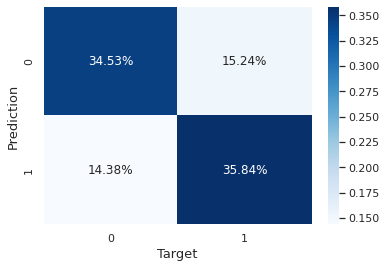

In [89]:
# To see what percentage of my data is represented in each quadrant
p = sns.heatmap(confusion_matrix(y_test, y_pred)/np.sum(confusion_matrix(y_test, y_pred)), annot=True, 
            fmt='.2%', cmap='Blues')

p.set_xlabel("Target", fontsize = 13)
p.set_ylabel("Prediction", fontsize = 13)

In [92]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[1554  686]
 [ 647 1613]]


Text(30.5, 0.5, 'Prediction')

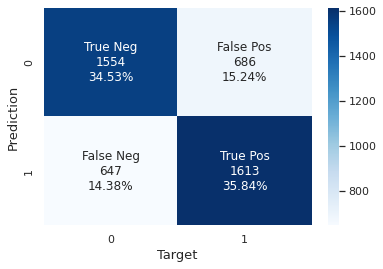

In [99]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
c = sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
c.set_xlabel("Target", fontsize = 13)
c.set_ylabel("Prediction", fontsize = 13)


# Predicting the sentiment of any unknown text

In [54]:
# Predicting the sentiment of any text

def predict_sentiment(text):
  # preprocessing the given text 
  text_seq = tokenizer.texts_to_sequences(text)
  text_pad = pad_sequences(text_seq, maxlen=padded_seq_len) # Pad the sequence so that it same size as train sequence length (Vocab_size)

  # predicting the class
  predicted_sentiment = model.predict(text_pad).round()

  if predicted_sentiment == 1.0:
    return(print('Positive sentiment'))
  else:
    return(print('Negative sentiment'))

In [63]:
# I Hate U, I Love U Song by Gnash --> arouses sad feelings and model predicted it right

text = ["feeling used but I am still missing you And I can't see the end of this Just wanna feel your kiss Against my lips And now all this time is passing by But I still can't seem to tell you why It hurts me every time I see you Realize how much I need you I hate you, I love you I hate that I love you Don't want to but I can't put Nobody else above you I hate you, I love you I hate that I want you You want her, you need her And I'll never be her"]
predict_sentiment(text)

Negative sentiment


In [64]:
# Heaven by Beyonce -> sad song 

text = ["I fought for you The hardest, it made me the strongest So tell me your secrets I just can't stand to see you leaving But Heaven couldn't wait for you No, Heaven couldn't wait for you Heaven couldn't wait for you No, Heaven couldn't wait for you So go on, go home We laughed at the darkness So scared that we lost it We stood on the ceilings You showed me love was all you needed"]
predict_sentiment(text)

Negative sentiment


In [65]:
# Party in the USA by Miley Cyrus -> Happy song
text = ["I hopped off the plane at LAX with a dream and my cardigan Welcome to the land of fame, excess, whoa am I gotta fit in? Jumped in the cab, here I am for the first time Look to my right, and I see the Hollywood sign This is all so crazy, everybody seems so famous My tummy's turnin' and I'm feelin' kinda homesick Too much pressure and I'm nervous That's when the taxi man turned on the radio And the Jay-Z song was on And the Jay-Z song was on And the Jay-Z song was on So I put my hands up, they're playin' my song The butterflies fly away I'm noddin' my head like Yeah! Movin' my hips like Yeah! Got my hands up, they're playin' my song And now I'm gonna be okay Yeah! It's a party in the USA! Yeah! It's a party in the USA!"]
predict_sentiment(text)

Positive sentiment


In [66]:
# Ariana Grande 7 rings -> arouses positive feelings predicted correctly 
text = ["Yeah, breakfast at Tiffany's and bottles of bubbles Girls with tattoos who like getting in trouble Lashes and diamonds, ATM machines Buy myself all of my favorite things (yeah) Been through some bad shit, I should be a sad bitch Who woulda thought it'd turn me to a savage? Rather be tied up with calls and not strings Write my own checks like I write what I sing, yeah (yeah) My wrist, stop watchin', my neck is flossy Make big deposits, my gloss is poppin' You like my hair? Gee, thanks, just bought it I see it, I like it, I want it, I got it (yeah) I want it, I got it, I want it, I got it I want it, I got it, I want it, I got it You like my hair? Gee, thanks, just bought it I see it, I like it, I want it, I got it (yeah) Wearing a ring, but ain't gon' be no Mrs. Bought matching diamonds for six of my bitches I'd rather spoil all my friends with my riches Think retail therapy my new addiction Whoever said money can't solve your problems Must not have had enough money to solve 'em They say, Which one? I say, Nah, I want all of 'em Happiness is the same price as red bottoms My smile is beamin', my skin is gleamin' The way it shine, I know you've seen it (you've seen it) I bought a crib just for the closet Both his and hers, I want it, I got it, yeah I want it, I got it, I want it, I got it I want it, I got it, I want it, I got it (baby) You like my hair? Gee, thanks, just bought it (oh yeah) I see it, I like it, I want it, I got it (yeah Yeah, my receipts, be lookin' like phone numbers If it ain't money, then wrong number Black card is my business card The way it be settin' the tone for me I don't mean to brag, but I be like, Put it in the bag,  yeah When you see them racks, they stacked up like my ass, yeah Shoot, go from the store to the booth Make it all back in one loop, give me the loot Never mind, I got the juice Nothing but net when we shoot Look at my neck, look at my jet Ain't got enough money to pay me respect Ain't no budget when I'm on the set If I like it, then that's what I get, yeah I want it, I got it, I want it, I got it (yeah) I want it, I got it, I want it, I got it (oh yeah, yeah) You like my hair? Gee, thanks, just bought it I see it, I like it, I want it, I got it (yeah)"] 
predict_sentiment(text)

Positive sentiment


In [68]:
# Ariana Grande Thank you next next 
text = ["Thought I'd end up with Sean But he wasn't a match Wrote some songs about Ricky Now I listen and laugh Even almost got married And for Pete, I'm so thankful Wish I could say thank you to Malcolm 'Cause he was an angel One taught me love One taught me patience And one taught me pain Now, I'm so amazing Say I've loved and I've lost But that's not what I see So, look what I got Look at what you taught me And for that, I say Thank you, next (next) Thank you, next (next) Thank you, next I'm so grateful for my ex Thank you, next (next) Thank you, next (next) Thank you, next (next) I'm so Spend more time with my friends I ain't worried 'bout nothin' Plus, I met someone else We're havin' better discussions I know they say I move on too fast But this one gon' last 'Cause her name is Ari And I'm so good with that (so good with that) She taught me love (love) She taught me patience (patience) She handles pain (pain) That amazing (yeah, she's amazing) I've loved and I've lost (yeah, yeah) But that's not what I see (yeah, yeah) 'Cause look what I've found (yeah, yeah) Ain't no need for searching And for that, I say Thank you, next (thank you, next) Thank you, next (thank you, next) Thank you, next (thank you) I'm so grateful for my ex Thank you, next (thank you, next) Thank you, next (said thank you, next) Thank you, next (next) I'm so grateful for my ex Thank you, next Thank you, next Thank you, next I'm so One day I'll walk down the aisle Holding hands with my mama I'll be thanking my dad 'Cause she grew from the drama Only wanna do it once, real bad Gon' make that last God forbid something happens Least this song is a smash (song is a smash) I've got so much love (love) Got so much patience (patience) I've learned from the pain (pain) I turned out amazing (turned out amazing) I've loved and I've lost (yeah, yeah) But that's not what I see (yeah, yeah) 'Cause look what I've found (yeah, yeah) Ain't no need for searching And for that, I'll say Thank you, next (thank you, next) Thank you, next (thank you, next) Thank you, next I'm so grateful for my ex Thank you, next (thank you, next) Thank you, next (said thank you, next) Thank you, next (next) I'm so grateful for my ex Thank you, next Thank you, next Thank you, next Yeah, yee Thank you, next Thank you, next Thank you, next Yeah, yee"]
predict_sentiment(text)

Positive sentiment


In [ ]:
# saving the model for future purpose
model.save('/content/drive/My Drive/Colab Notebooks/data/models_saved/LSTM_valence.h5')   # creates HDF5 file for model

# Save model

In [ ]:
from keras.models import model_from_json
# serialize model to json
json_model = model.to_json()
#save the model architecture to JSON file
with open('/content/drive/My Drive/Colab Notebooks/data/models_saved/lyrics_LSTM_model.json', 'w') as json_file:
    json_file.write(json_model)

#saving the weights of the model
model.save_weights('/content/drive/My Drive/Colab Notebooks/data/models_saved/lyrics_LSTM_weights.h5')
#Model loss and accuracy
loss,acc = model.evaluate(pad_test, y_test, verbose=2)

141/141 - 15s - loss: 0.5831 - accuracy: 0.7004 - 15s/epoch - 108ms/step


# Load model

In [71]:
from keras.initializers import glorot_uniform
#Reading the model from JSON file
with open('/content/drive/My Drive/Colab Notebooks/data/models_saved/lyrics_LSTM_model.json', 'r') as json_file:
    json_savedModel= json_file.read()

    
#load the model architecture 
model_j = tf.keras.models.model_from_json(json_savedModel) 
model_j.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1286)]            0         
                                                                 
 embedding (Embedding)       (None, 1286, 20)          561040    
                                                                 
 lstm (LSTM)                 (None, 1286, 15)          2160      
                                                                 
 global_max_pooling1d (Globa  (None, 15)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 32)                512       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                             

In [72]:
model_j.load_weights('/content/drive/My Drive/Colab Notebooks/data/models_saved/lyrics_LSTM_weights.h5')

In [73]:
#Compiling the model
model_j.compile(loss='binary_crossentropy',
         optimizer='adam',
         metrics=['accuracy'])

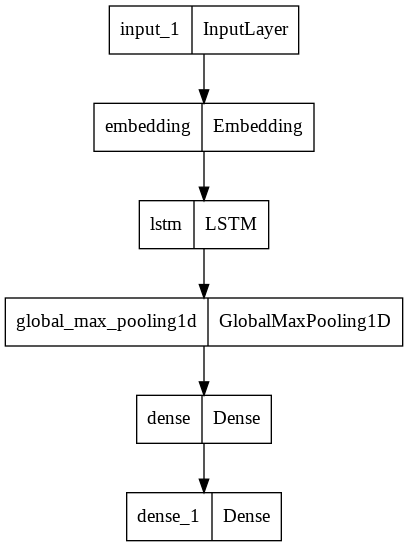

In [74]:
from tensorflow.keras.utils import plot_model
plot_model(model_j)

In [75]:
# Predicting the sentiment of any text

def predict_sentiment1(text):
  # preprocessing the given text 
  padded_seq_len = 1286  # derived above
  text_seq = tokenizer.texts_to_sequences(text)
  text_pad = pad_sequences(text_seq, maxlen=padded_seq_len) # Pad the sequence so that it same size as train sequence length (Vocab_size)

  # predicting the class
  predicted_sentiment = model_j.predict(text_pad).round()

  if predicted_sentiment == 1.0:
    return(print('Positive sentiment'))
  else:
    return(print('Negative sentiment'))

In [86]:
# Party in the USA by Miley Cyrus -> Happy song
text = ["I hopped off the plane at LAX with a dream and my cardigan Welcome to the land of fame, excess, whoa am I gotta fit in? Jumped in the cab, here I am for the first time Look to my right, and I see the Hollywood sign This is all so crazy, everybody seems so famous My tummy's turnin' and I'm feelin' kinda homesick Too much pressure and I'm nervous That's when the taxi man turned on the radio And the Jay-Z song was on And the Jay-Z song was on And the Jay-Z song was on So I put my hands up, they're playin' my song The butterflies fly away I'm noddin' my head like Yeah! Movin' my hips like Yeah! Got my hands up, they're playin' my song And now I'm gonna be okay Yeah! It's a party in the USA! Yeah! It's a party in the USA!"]
predict_sentiment(text)

Positive sentiment


In [83]:
# I Hate U, I Love U Song by Gnash --> arouses sad feelings and model predicted it right

text = ["feeling used but I am still missing you And I can't see the end of this Just wanna feel your kiss Against my lips And now all this time is passing by But I still can't seem to tell you why It hurts me every time I see you Realize how much I need you I hate you, I love you I hate that I love you Don't want to but I can't put Nobody else above you I hate you, I love you I hate that I want you You want her, you need her And I'll never be her"]
predict_sentiment(text)

Negative sentiment


In [84]:
# Heaven by Beyonce -> sad song 

text = ["I fought for you The hardest, it made me the strongest So tell me your secrets I just can't stand to see you leaving But Heaven couldn't wait for you No, Heaven couldn't wait for you Heaven couldn't wait for you No, Heaven couldn't wait for you So go on, go home We laughed at the darkness So scared that we lost it We stood on the ceilings You showed me love was all you needed"]
predict_sentiment(text)

Negative sentiment


In [85]:
# Ariana Grande 7 rings -> arouses positive feelings predicted correctly 
text = ["Yeah, breakfast at Tiffany's and bottles of bubbles Girls with tattoos who like getting in trouble Lashes and diamonds, ATM machines Buy myself all of my favorite things (yeah) Been through some bad shit, I should be a sad bitch Who woulda thought it'd turn me to a savage? Rather be tied up with calls and not strings Write my own checks like I write what I sing, yeah (yeah) My wrist, stop watchin', my neck is flossy Make big deposits, my gloss is poppin' You like my hair? Gee, thanks, just bought it I see it, I like it, I want it, I got it (yeah) I want it, I got it, I want it, I got it I want it, I got it, I want it, I got it You like my hair? Gee, thanks, just bought it I see it, I like it, I want it, I got it (yeah) Wearing a ring, but ain't gon' be no Mrs. Bought matching diamonds for six of my bitches I'd rather spoil all my friends with my riches Think retail therapy my new addiction Whoever said money can't solve your problems Must not have had enough money to solve 'em They say, Which one? I say, Nah, I want all of 'em Happiness is the same price as red bottoms My smile is beamin', my skin is gleamin' The way it shine, I know you've seen it (you've seen it) I bought a crib just for the closet Both his and hers, I want it, I got it, yeah I want it, I got it, I want it, I got it I want it, I got it, I want it, I got it (baby) You like my hair? Gee, thanks, just bought it (oh yeah) I see it, I like it, I want it, I got it (yeah Yeah, my receipts, be lookin' like phone numbers If it ain't money, then wrong number Black card is my business card The way it be settin' the tone for me I don't mean to brag, but I be like, Put it in the bag,  yeah When you see them racks, they stacked up like my ass, yeah Shoot, go from the store to the booth Make it all back in one loop, give me the loot Never mind, I got the juice Nothing but net when we shoot Look at my neck, look at my jet Ain't got enough money to pay me respect Ain't no budget when I'm on the set If I like it, then that's what I get, yeah I want it, I got it, I want it, I got it (yeah) I want it, I got it, I want it, I got it (oh yeah, yeah) You like my hair? Gee, thanks, just bought it I see it, I like it, I want it, I got it (yeah)"] 
predict_sentiment(text)

Positive sentiment


# References
[1.] https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

[2.] https://stackoverflow.com/questions/69875073/confusion-matrix-valueerror-classification-metrics-cant-handle-a-mix-of-binary

[3.]  https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers

[4.] https://activewizards.com/blog/sentiment-analysis-with-naive-bayes-and-lstm/

[5.] https://www.youtube.com/watch?v=e0WW5w13V64

[6.] https://www.youtube.com/watch?v=XsceLCzARqQ

[7.] https://www.youtube.com/watch?v=P0o5U9pq8_s